In [23]:
import nltk
import sklearn
import pandas as pd
import numpy as np
from nltk.corpus import CategorizedPlaintextCorpusReader
from nltk import FreqDist
from nltk.corpus import stopwords
import string
import re
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# project module
from benchmark import get_benchmark
from yellowbrick.text import FreqDistVisualizer
from sklearn.feature_extraction.text import CountVectorizer
from os import path
import os
import seaborn as sns
sns.set()
from wordcloud import WordCloud
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from util import corpus_to_df

In [13]:
def plot_result(results):
    indices = np.arange(len(results))

    results = [[x[i] for x in results] for i in range(4)]

    clf_names, score, training_time, test_time = results
    training_time = np.array(training_time) / np.max(training_time)
    test_time = np.array(test_time) / np.max(test_time)

    plt.figure(figsize=(12, 8))
    plt.title("Score")
    plt.barh(indices, score, .2, label="score", color='navy')
    plt.barh(indices + .3, training_time, .2, label="training time",
             color='c')
    plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
    plt.yticks(())
    plt.legend(loc='best')
    plt.subplots_adjust(left=.25)
    plt.subplots_adjust(top=.95)
    plt.subplots_adjust(bottom=.05)

    for i, c in zip(indices, clf_names):
        plt.text(-.3, i, c)

    plt.show()

In [14]:
doc_pattern = r'.*\.txt';
cat_pattern = r'([\w_/]+)/.*';
corpus_en_cleaned =CategorizedPlaintextCorpusReader('/Users/septem/Downloads/companies_cleaned/en/', doc_pattern, cat_pattern=cat_pattern)
corpus_nl_cleaned =CategorizedPlaintextCorpusReader('/Users/septem/Downloads/companies_cleaned/nl/', doc_pattern, cat_pattern=cat_pattern)
corpus_cleaned = CategorizedPlaintextCorpusReader('/Users/septem/Downloads/companies_cleaned/', doc_pattern, cat_pattern = cat_pattern)
len(corpus_en_cleaned.fileids()), len(corpus_nl_cleaned.fileids())

(900, 3884)

In [6]:
df = corpus_to_df(corpus_cleaned)
x_train, x_test, y_train, y_test = train_test_split(df['id'], df['innov_'], test_size=0.1, stratify = df['innov_'], random_state=42)
tfidf = TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(corpus_cleaned.raw(id) for id in x_train)
x_test_tfidf = tfidf.transform(corpus_cleaned.raw(id) for id in x_test)

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None, solver='sag',
                tol=0.01)


/Users/septem/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:557: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '


train time: 2.577s
test time:  0.003s
accuracy:   0.633
dimensionality: 362446
density: 1.000000
classification report:
              precision    recall  f1-score   support

      others       0.61      0.52      0.56       219
       innov       0.64      0.73      0.68       263

    accuracy                           0.63       482
   macro avg       0.63      0.62      0.62       482
weighted avg       0.63      0.63      0.63       482

confusion matrix:


<Figure size 432x288 with 0 Axes>

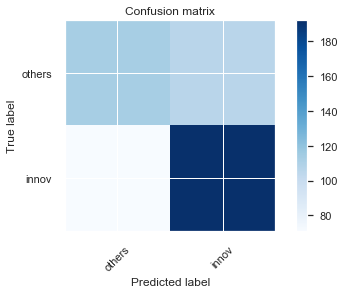


Perceptron
________________________________________________________________________________
Training: 
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=50, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)
train time: 0.205s
test time:  0.002s
accuracy:   0.602
dimensionality: 362446
density: 0.817744
classification report:
              precision    recall  f1-score   support

      others       0.58      0.43      0.50       219
       innov       0.61      0.74      0.67       263

    accuracy                           0.60       482
   macro avg       0.60      0.59      0.58       482
weighted avg       0.60      0.60      0.59       482

confusion matrix:


<Figure size 432x288 with 0 Axes>

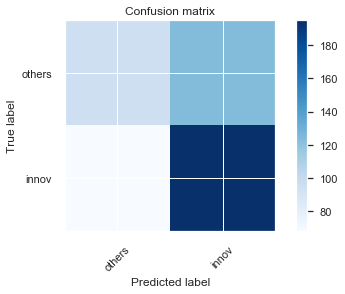


Passive-Aggressive
________________________________________________________________________________
Training: 
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)
train time: 0.697s
test time:  0.002s
accuracy:   0.614
dimensionality: 362446
density: 0.996121
classification report:
              precision    recall  f1-score   support

      others       0.57      0.60      0.58       219
       innov       0.65      0.63      0.64       263

    accuracy                           0.61       482
   macro avg       0.61      0.61      0.61       482
weighted avg       0.62      0.61      0.61       482

confusion matrix:


<Figure size 432x288 with 0 Axes>

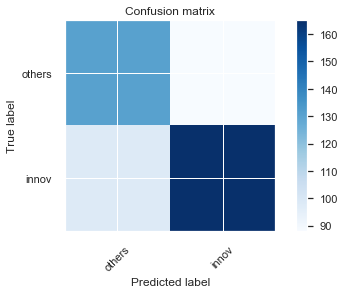


kNN
________________________________________________________________________________
Training: 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
train time: 0.031s
test time:  1.360s
accuracy:   0.581
classification report:
              precision    recall  f1-score   support

      others       0.53      0.65      0.59       219
       innov       0.64      0.52      0.58       263

    accuracy                           0.58       482
   macro avg       0.59      0.59      0.58       482
weighted avg       0.59      0.58      0.58       482

confusion matrix:


<Figure size 432x288 with 0 Axes>

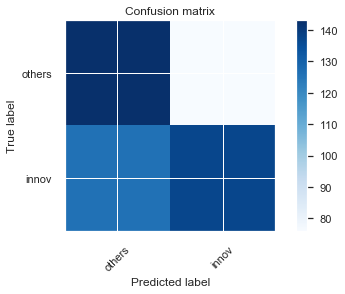


Random forest
________________________________________________________________________________
Training: 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
train time: 183.632s
test time:  0.401s
accuracy:   0.631
classification report:
              precision    recall  f1-score   support

      others       0.61      0.51      0.55       219
       innov       0.64      0.73      0.68       263

    accuracy                           0.63       482
   macro avg       0.63      0.62      0.62    

<Figure size 432x288 with 0 Axes>

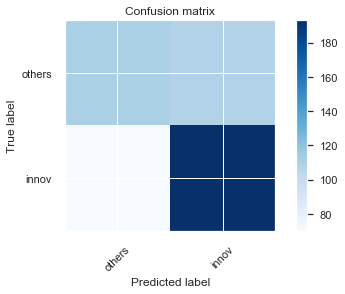


L2 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
          verbose=0)
train time: 1.306s
test time:  0.002s
accuracy:   0.624
dimensionality: 362446
density: 1.000000
classification report:
              precision    recall  f1-score   support

      others       0.60      0.53      0.56       219
       innov       0.64      0.70      0.67       263

    accuracy                           0.62       482
   macro avg       0.62      0.62      0.62       482
weighted avg       0.62      0.62      0.62       482

confusion matrix:


<Figure size 432x288 with 0 Axes>

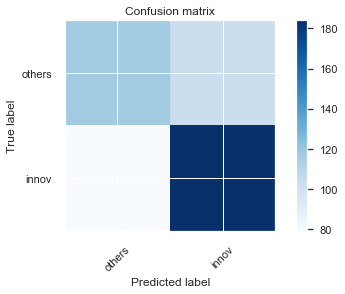


________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=50,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
train time: 0.568s
test time:  0.002s
accuracy:   0.620
dimensionality: 362446
density: 0.991475
classification report:
              precision    recall  f1-score   support

      others       0.59      0.55      0.57       219
       innov       0.64      0.68      0.66       263

    accuracy                           0.62       482
   macro avg       0.62      0.61      0.61       482
weighted avg       0.62      0.62      0.62       482

confusion matrix:


<Figure size 432x288 with 0 Axes>

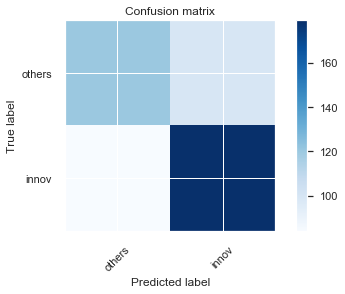


L1 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
          verbose=0)
train time: 0.872s
test time:  0.003s
accuracy:   0.629
dimensionality: 362446
density: 0.005488
classification report:
              precision    recall  f1-score   support

      others       0.62      0.47      0.54       219
       innov       0.63      0.76      0.69       263

    accuracy                           0.63       482
   macro avg       0.63      0.62      0.61       482
weighted avg       0.63      0.63      0.62       482

confusion matrix:


<Figure size 432x288 with 0 Axes>

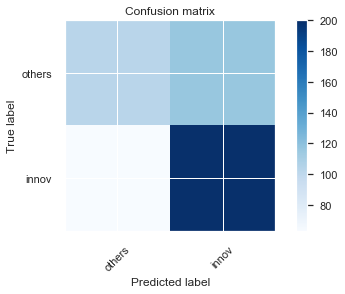


________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=50,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
train time: 2.317s
test time:  0.002s
accuracy:   0.645
dimensionality: 362446
density: 0.008567
classification report:
              precision    recall  f1-score   support

      others       0.64      0.50      0.56       219
       innov       0.65      0.76      0.70       263

    accuracy                           0.65       482
   macro avg       0.64      0.63      0.63       482
weighted avg       0.64      0.65      0.64       482

confusion matrix:


<Figure size 432x288 with 0 Axes>

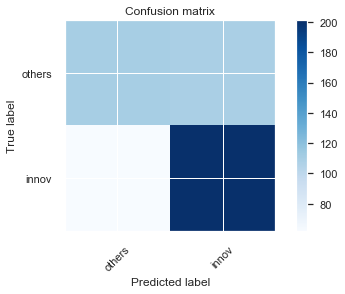


Elastic-Net penalty
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=50,
              n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
train time: 3.209s
test time:  0.003s
accuracy:   0.624
dimensionality: 362446
density: 0.068689
classification report:
              precision    recall  f1-score   support

      others       0.59      0.56      0.57       219
       innov       0.65      0.68      0.66       263

    accuracy                           0.62       482
   macro avg       0.62      0.62      0.62       482
weighted avg       0.62      0.62      0.62       482

confusion 

<Figure size 432x288 with 0 Axes>

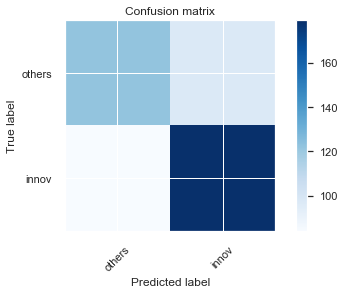


NearestCentroid (aka Rocchio classifier)
________________________________________________________________________________
Training: 
NearestCentroid(metric='euclidean', shrink_threshold=None)
train time: 0.106s
test time:  0.012s
accuracy:   0.585
classification report:
              precision    recall  f1-score   support

      others       0.53      0.72      0.61       219
       innov       0.67      0.47      0.55       263

    accuracy                           0.59       482
   macro avg       0.60      0.60      0.58       482
weighted avg       0.61      0.59      0.58       482

confusion matrix:


<Figure size 432x288 with 0 Axes>

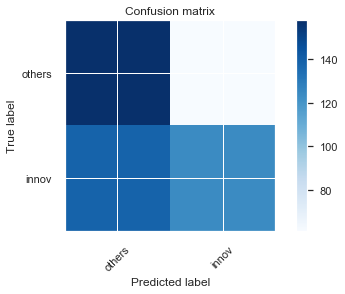


Naive Bayes
________________________________________________________________________________
Training: 
MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
train time: 0.062s
test time:  0.008s
accuracy:   0.629
dimensionality: 362446
density: 1.000000
classification report:
              precision    recall  f1-score   support

      others       0.58      0.63      0.61       219
       innov       0.67      0.63      0.65       263

    accuracy                           0.63       482
   macro avg       0.63      0.63      0.63       482
weighted avg       0.63      0.63      0.63       482

confusion matrix:


<Figure size 432x288 with 0 Axes>

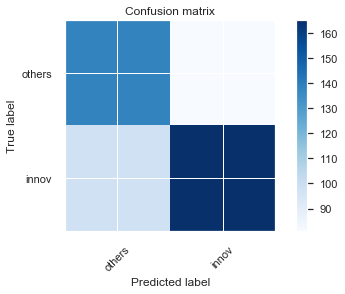


________________________________________________________________________________
Training: 
BernoulliNB(alpha=0.01, binarize=0.0, class_prior=None, fit_prior=True)
train time: 0.089s
test time:  0.023s
accuracy:   0.616
dimensionality: 362446
density: 1.000000
classification report:
              precision    recall  f1-score   support

      others       0.55      0.82      0.66       219
       innov       0.75      0.45      0.56       263

    accuracy                           0.62       482
   macro avg       0.65      0.63      0.61       482
weighted avg       0.66      0.62      0.61       482

confusion matrix:


<Figure size 432x288 with 0 Axes>

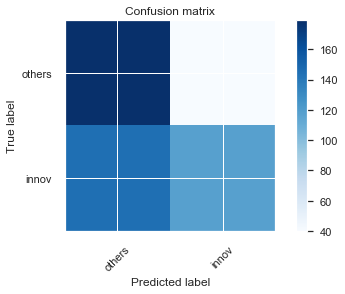


________________________________________________________________________________
Training: 
ComplementNB(alpha=0.1, class_prior=None, fit_prior=True, norm=False)
train time: 0.053s
test time:  0.010s
accuracy:   0.629
dimensionality: 362446
density: 1.000000
classification report:
              precision    recall  f1-score   support

      others       0.61      0.51      0.56       219
       innov       0.64      0.73      0.68       263

    accuracy                           0.63       482
   macro avg       0.62      0.62      0.62       482
weighted avg       0.63      0.63      0.62       482

confusion matrix:


<Figure size 432x288 with 0 Axes>

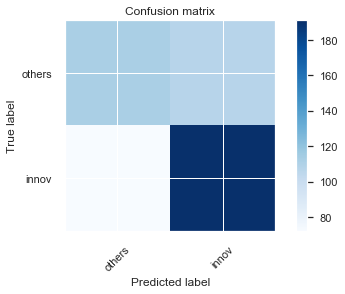


LinearSVC with L1-based feature selection
________________________________________________________________________________
Training: 
Pipeline(memory=None,
         steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     loss='squared_hinge',
                                                     max_iter=1000,
                                                     multi_class='ovr',
                                                     penalty='l1',
                                                     random_state=None,
                                                     tol=0.001, verbose=0),
                                 max_features=None, norm_order=1, prefit=False,
    

<Figure size 432x288 with 0 Axes>

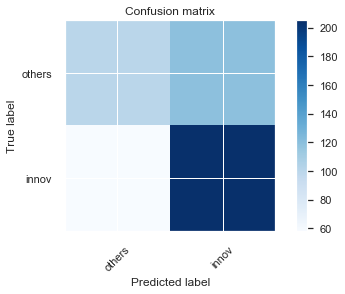

In [7]:
results = get_benchmark(x_train_tfidf, y_train, x_test_tfidf, y_test)

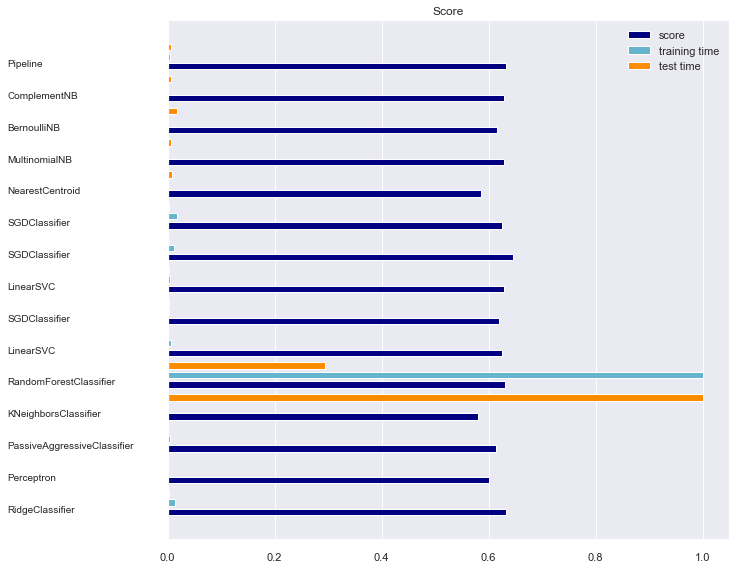

In [11]:
plot_result(results)

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None, solver='sag',
                tol=0.01)


/Users/septem/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:557: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '


train time: 0.270s
test time:  0.001s
accuracy:   0.656
dimensionality: 92396
density: 1.000000
classification report:
              precision    recall  f1-score   support

      others       0.50      0.10      0.16        31
       innov       0.67      0.95      0.78        59

    accuracy                           0.66        90
   macro avg       0.58      0.52      0.47        90
weighted avg       0.61      0.66      0.57        90

confusion matrix:


<Figure size 432x288 with 0 Axes>

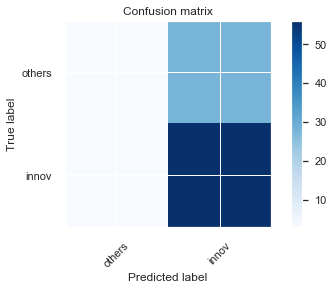


Perceptron
________________________________________________________________________________
Training: 
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=50, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)
train time: 0.041s
test time:  0.001s
accuracy:   0.644
dimensionality: 92396
density: 0.755227
classification report:
              precision    recall  f1-score   support

      others       0.45      0.16      0.24        31
       innov       0.67      0.90      0.77        59

    accuracy                           0.64        90
   macro avg       0.56      0.53      0.50        90
weighted avg       0.60      0.64      0.59        90

confusion matrix:


<Figure size 432x288 with 0 Axes>

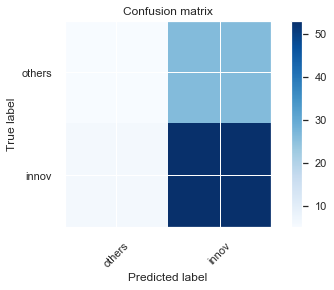


Passive-Aggressive
________________________________________________________________________________
Training: 
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)
train time: 0.084s
test time:  0.001s
accuracy:   0.633
dimensionality: 92396
density: 0.998041
classification report:
              precision    recall  f1-score   support

      others       0.43      0.19      0.27        31
       innov       0.67      0.86      0.76        59

    accuracy                           0.63        90
   macro avg       0.55      0.53      0.51        90
weighted avg       0.59      0.63      0.59        90

confusion matrix:


<Figure size 432x288 with 0 Axes>

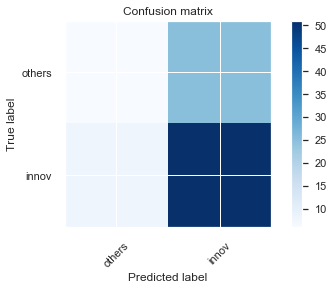


kNN
________________________________________________________________________________
Training: 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
train time: 0.007s
test time:  0.081s
accuracy:   0.544
classification report:
              precision    recall  f1-score   support

      others       0.38      0.48      0.42        31
       innov       0.68      0.58      0.62        59

    accuracy                           0.54        90
   macro avg       0.53      0.53      0.52        90
weighted avg       0.57      0.54      0.55        90

confusion matrix:


<Figure size 432x288 with 0 Axes>

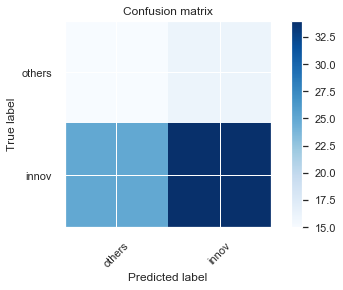


Random forest
________________________________________________________________________________
Training: 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
train time: 3.906s
test time:  0.070s
accuracy:   0.656
classification report:
              precision    recall  f1-score   support

      others       0.50      0.06      0.11        31
       innov       0.66      0.97      0.79        59

    accuracy                           0.66        90
   macro avg       0.58      0.52      0.45      

<Figure size 432x288 with 0 Axes>

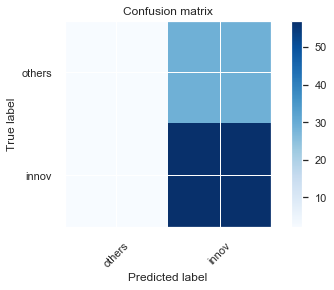


L2 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
          verbose=0)
train time: 0.265s
test time:  0.001s
accuracy:   0.667
dimensionality: 92396
density: 1.000000
classification report:
              precision    recall  f1-score   support

      others       0.56      0.16      0.25        31
       innov       0.68      0.93      0.79        59

    accuracy                           0.67        90
   macro avg       0.62      0.55      0.52        90
weighted avg       0.64      0.67      0.60        90

confusion matrix:


<Figure size 432x288 with 0 Axes>

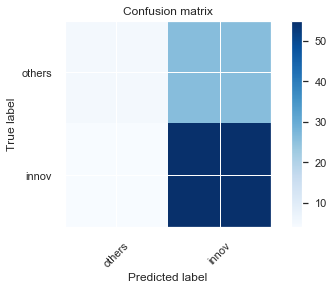


________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=50,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
train time: 0.065s
test time:  0.001s
accuracy:   0.622
dimensionality: 92396
density: 0.980919
classification report:
              precision    recall  f1-score   support

      others       0.40      0.19      0.26        31
       innov       0.67      0.85      0.75        59

    accuracy                           0.62        90
   macro avg       0.53      0.52      0.50        90
weighted avg       0.57      0.62      0.58        90

confusion matrix:


<Figure size 432x288 with 0 Axes>

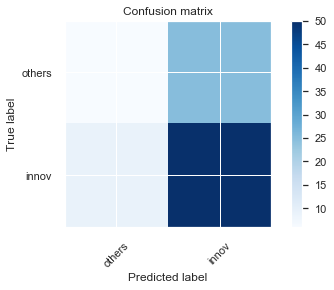


L1 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
          verbose=0)
train time: 0.117s
test time:  0.001s
accuracy:   0.622
dimensionality: 92396
density: 0.003128
classification report:
              precision    recall  f1-score   support

      others       0.33      0.10      0.15        31
       innov       0.65      0.90      0.76        59

    accuracy                           0.62        90
   macro avg       0.49      0.50      0.45        90
weighted avg       0.54      0.62      0.55        90

confusion matrix:


<Figure size 432x288 with 0 Axes>

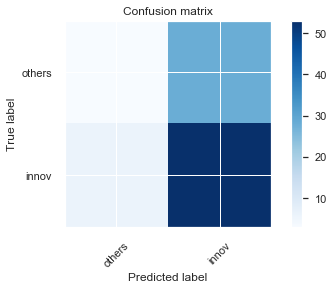


________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=50,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
train time: 0.105s
test time:  0.001s
accuracy:   0.600
dimensionality: 92396
density: 0.013301
classification report:
              precision    recall  f1-score   support

      others       0.27      0.10      0.14        31
       innov       0.65      0.86      0.74        59

    accuracy                           0.60        90
   macro avg       0.46      0.48      0.44        90
weighted avg       0.52      0.60      0.53        90

confusion matrix:


<Figure size 432x288 with 0 Axes>

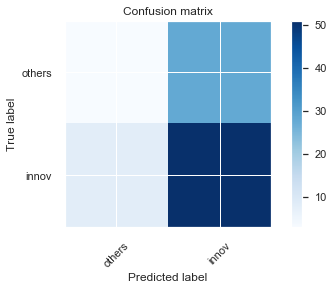


Elastic-Net penalty
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=50,
              n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
train time: 0.268s
test time:  0.000s
accuracy:   0.644
dimensionality: 92396
density: 0.070663
classification report:
              precision    recall  f1-score   support

      others       0.45      0.16      0.24        31
       innov       0.67      0.90      0.77        59

    accuracy                           0.64        90
   macro avg       0.56      0.53      0.50        90
weighted avg       0.60      0.64      0.59        90

confusion m

<Figure size 432x288 with 0 Axes>

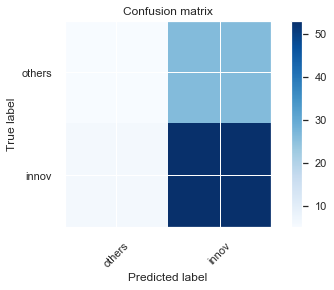


NearestCentroid (aka Rocchio classifier)
________________________________________________________________________________
Training: 
NearestCentroid(metric='euclidean', shrink_threshold=None)
train time: 0.028s
test time:  0.002s
accuracy:   0.644
classification report:
              precision    recall  f1-score   support

      others       0.45      0.16      0.24        31
       innov       0.67      0.90      0.77        59

    accuracy                           0.64        90
   macro avg       0.56      0.53      0.50        90
weighted avg       0.60      0.64      0.59        90

confusion matrix:


<Figure size 432x288 with 0 Axes>

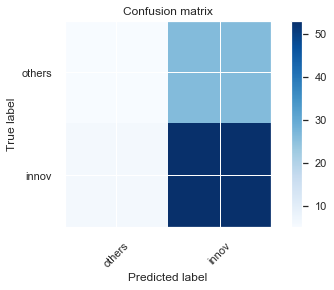


Naive Bayes
________________________________________________________________________________
Training: 
MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
train time: 0.017s
test time:  0.002s
accuracy:   0.611
dimensionality: 92396
density: 1.000000
classification report:
              precision    recall  f1-score   support

      others       0.33      0.13      0.19        31
       innov       0.65      0.86      0.74        59

    accuracy                           0.61        90
   macro avg       0.49      0.50      0.47        90
weighted avg       0.54      0.61      0.55        90

confusion matrix:


<Figure size 432x288 with 0 Axes>

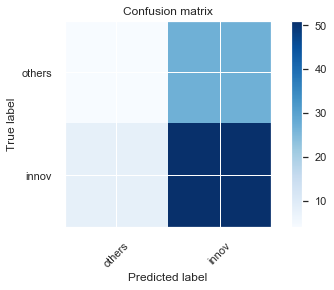


________________________________________________________________________________
Training: 
BernoulliNB(alpha=0.01, binarize=0.0, class_prior=None, fit_prior=True)
train time: 0.028s
test time:  0.006s
accuracy:   0.589
dimensionality: 92396
density: 1.000000
classification report:
              precision    recall  f1-score   support

      others       0.41      0.45      0.43        31
       innov       0.70      0.66      0.68        59

    accuracy                           0.59        90
   macro avg       0.55      0.56      0.55        90
weighted avg       0.60      0.59      0.59        90

confusion matrix:


<Figure size 432x288 with 0 Axes>

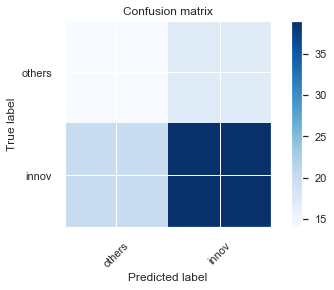


________________________________________________________________________________
Training: 
ComplementNB(alpha=0.1, class_prior=None, fit_prior=True, norm=False)
train time: 0.012s
test time:  0.003s
accuracy:   0.644
dimensionality: 92396
density: 1.000000
classification report:
              precision    recall  f1-score   support

      others       0.40      0.06      0.11        31
       innov       0.66      0.95      0.78        59

    accuracy                           0.64        90
   macro avg       0.53      0.51      0.44        90
weighted avg       0.57      0.64      0.55        90

confusion matrix:


<Figure size 432x288 with 0 Axes>

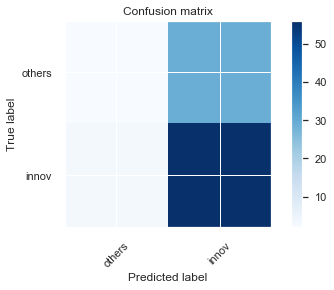


LinearSVC with L1-based feature selection
________________________________________________________________________________
Training: 
Pipeline(memory=None,
         steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     loss='squared_hinge',
                                                     max_iter=1000,
                                                     multi_class='ovr',
                                                     penalty='l1',
                                                     random_state=None,
                                                     tol=0.001, verbose=0),
                                 max_features=None, norm_order=1, prefit=False,
    

<Figure size 432x288 with 0 Axes>

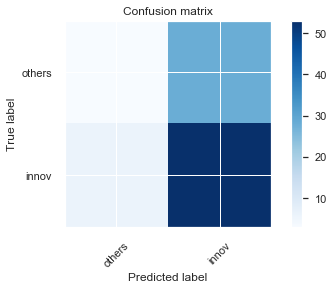

In [19]:
df = corpus_to_df(corpus_cleaned, language='en')
x_train, x_test, y_train, y_test = train_test_split(df['id'], df['innov_'], test_size=0.1, stratify = df['innov_'], random_state=42)
tfidf = TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(corpus_cleaned.raw(id) for id in x_train)
x_test_tfidf = tfidf.transform(corpus_cleaned.raw(id) for id in x_test)
results = get_benchmark(x_train_tfidf, y_train, x_test_tfidf, y_test)

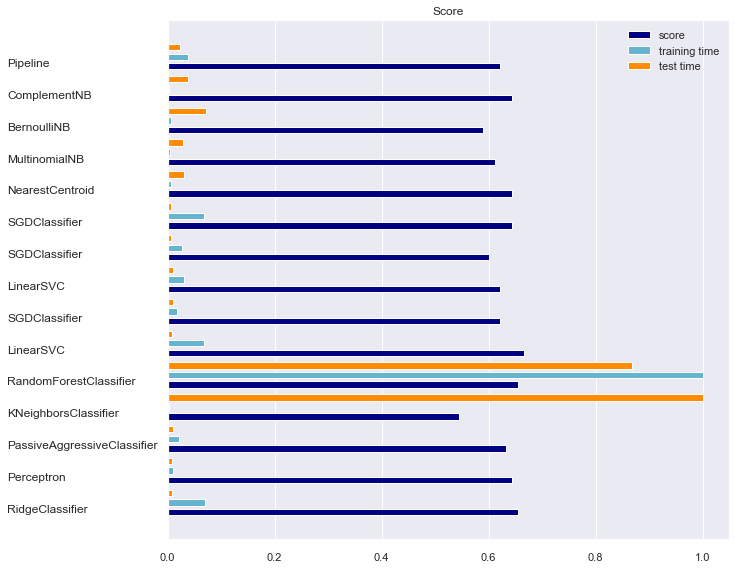

In [20]:
plot_result(results)

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None, solver='sag',
                tol=0.01)


/Users/septem/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:557: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '


train time: 1.806s
test time:  0.002s
accuracy:   0.640
dimensionality: 311707
density: 1.000000
classification report:
              precision    recall  f1-score   support

      others       0.65      0.56      0.60       187
       innov       0.64      0.72      0.67       202

    accuracy                           0.64       389
   macro avg       0.64      0.64      0.64       389
weighted avg       0.64      0.64      0.64       389

confusion matrix:


<Figure size 432x288 with 0 Axes>

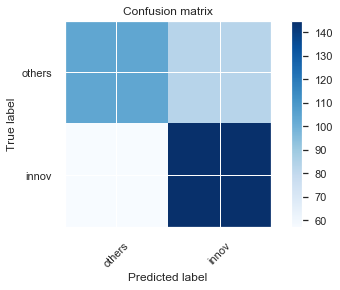


Perceptron
________________________________________________________________________________
Training: 
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=50, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)
train time: 0.161s
test time:  0.002s
accuracy:   0.609
dimensionality: 311707
density: 0.815991
classification report:
              precision    recall  f1-score   support

      others       0.61      0.51      0.56       187
       innov       0.61      0.70      0.65       202

    accuracy                           0.61       389
   macro avg       0.61      0.61      0.60       389
weighted avg       0.61      0.61      0.61       389

confusion matrix:


<Figure size 432x288 with 0 Axes>

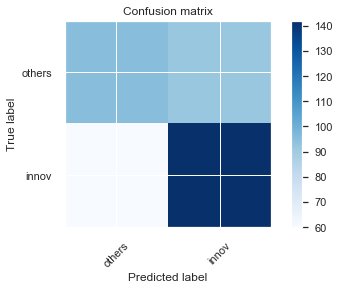


Passive-Aggressive
________________________________________________________________________________
Training: 
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)
train time: 0.416s
test time:  0.002s
accuracy:   0.612
dimensionality: 311707
density: 0.997049
classification report:
              precision    recall  f1-score   support

      others       0.61      0.54      0.57       187
       innov       0.61      0.68      0.64       202

    accuracy                           0.61       389
   macro avg       0.61      0.61      0.61       389
weighted avg       0.61      0.61      0.61       389

confusion matrix:


<Figure size 432x288 with 0 Axes>

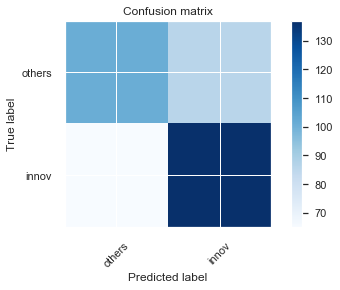


kNN
________________________________________________________________________________
Training: 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
train time: 0.026s
test time:  0.828s
accuracy:   0.545
classification report:
              precision    recall  f1-score   support

      others       0.52      0.69      0.59       187
       innov       0.59      0.41      0.48       202

    accuracy                           0.54       389
   macro avg       0.55      0.55      0.54       389
weighted avg       0.56      0.54      0.54       389

confusion matrix:


<Figure size 432x288 with 0 Axes>

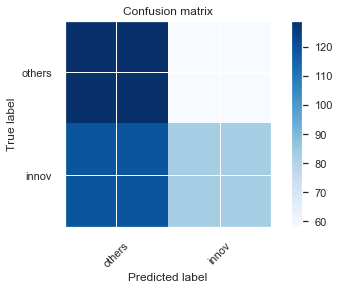


Random forest
________________________________________________________________________________
Training: 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
train time: 117.352s
test time:  0.335s
accuracy:   0.594
classification report:
              precision    recall  f1-score   support

      others       0.58      0.58      0.58       187
       innov       0.61      0.61      0.61       202

    accuracy                           0.59       389
   macro avg       0.59      0.59      0.59    

<Figure size 432x288 with 0 Axes>

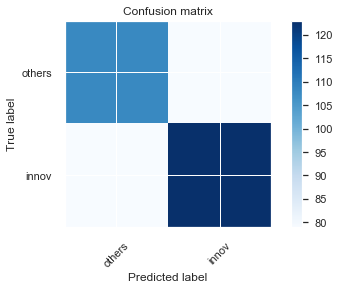


L2 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
          verbose=0)
train time: 1.546s
test time:  0.002s
accuracy:   0.643
dimensionality: 311707
density: 1.000000
classification report:
              precision    recall  f1-score   support

      others       0.65      0.56      0.60       187
       innov       0.64      0.72      0.68       202

    accuracy                           0.64       389
   macro avg       0.64      0.64      0.64       389
weighted avg       0.64      0.64      0.64       389

confusion matrix:


<Figure size 432x288 with 0 Axes>

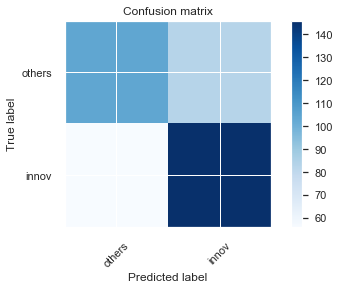


________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=50,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
train time: 0.553s
test time:  0.002s
accuracy:   0.627
dimensionality: 311707
density: 0.992339
classification report:
              precision    recall  f1-score   support

      others       0.62      0.57      0.59       187
       innov       0.63      0.68      0.66       202

    accuracy                           0.63       389
   macro avg       0.63      0.63      0.62       389
weighted avg       0.63      0.63      0.63       389

confusion matrix:


<Figure size 432x288 with 0 Axes>

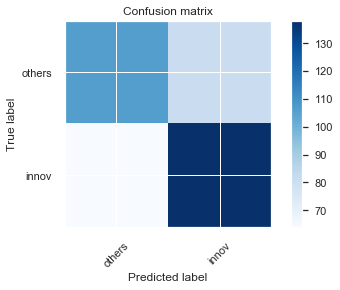


L1 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
          verbose=0)
train time: 1.058s
test time:  0.002s
accuracy:   0.625
dimensionality: 311707
density: 0.005557
classification report:
              precision    recall  f1-score   support

      others       0.64      0.51      0.57       187
       innov       0.62      0.73      0.67       202

    accuracy                           0.62       389
   macro avg       0.63      0.62      0.62       389
weighted avg       0.63      0.62      0.62       389

confusion matrix:


<Figure size 432x288 with 0 Axes>

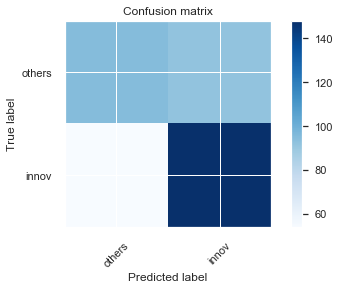


________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=50,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
train time: 1.987s
test time:  0.003s
accuracy:   0.617
dimensionality: 311707
density: 0.010343
classification report:
              precision    recall  f1-score   support

      others       0.63      0.50      0.56       187
       innov       0.61      0.72      0.66       202

    accuracy                           0.62       389
   macro avg       0.62      0.61      0.61       389
weighted avg       0.62      0.62      0.61       389

confusion matrix:


<Figure size 432x288 with 0 Axes>

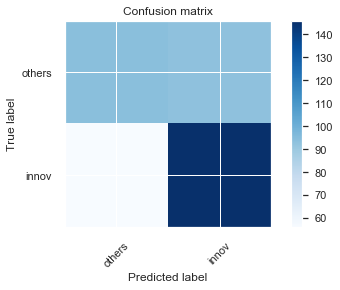


Elastic-Net penalty
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=50,
              n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
train time: 2.311s
test time:  0.002s
accuracy:   0.612
dimensionality: 311707
density: 0.073444
classification report:
              precision    recall  f1-score   support

      others       0.61      0.53      0.57       187
       innov       0.61      0.69      0.65       202

    accuracy                           0.61       389
   macro avg       0.61      0.61      0.61       389
weighted avg       0.61      0.61      0.61       389

confusion 

<Figure size 432x288 with 0 Axes>

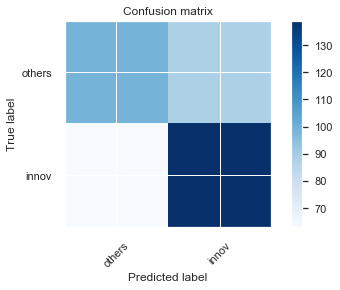


NearestCentroid (aka Rocchio classifier)
________________________________________________________________________________
Training: 
NearestCentroid(metric='euclidean', shrink_threshold=None)
train time: 0.128s
test time:  0.009s
accuracy:   0.643
classification report:
              precision    recall  f1-score   support

      others       0.63      0.63      0.63       187
       innov       0.66      0.66      0.66       202

    accuracy                           0.64       389
   macro avg       0.64      0.64      0.64       389
weighted avg       0.64      0.64      0.64       389

confusion matrix:


<Figure size 432x288 with 0 Axes>

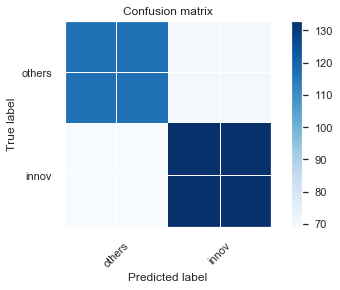


Naive Bayes
________________________________________________________________________________
Training: 
MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
train time: 0.068s
test time:  0.007s
accuracy:   0.614
dimensionality: 311707
density: 1.000000
classification report:
              precision    recall  f1-score   support

      others       0.60      0.57      0.59       187
       innov       0.62      0.65      0.64       202

    accuracy                           0.61       389
   macro avg       0.61      0.61      0.61       389
weighted avg       0.61      0.61      0.61       389

confusion matrix:


<Figure size 432x288 with 0 Axes>

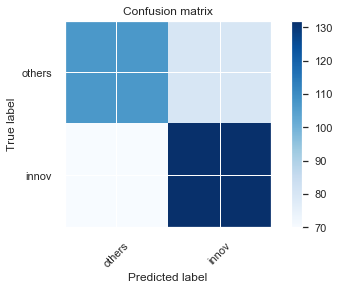


________________________________________________________________________________
Training: 
BernoulliNB(alpha=0.01, binarize=0.0, class_prior=None, fit_prior=True)
train time: 0.134s
test time:  0.027s
accuracy:   0.586
dimensionality: 311707
density: 1.000000
classification report:
              precision    recall  f1-score   support

      others       0.55      0.76      0.64       187
       innov       0.66      0.42      0.51       202

    accuracy                           0.59       389
   macro avg       0.60      0.59      0.58       389
weighted avg       0.61      0.59      0.57       389

confusion matrix:


<Figure size 432x288 with 0 Axes>

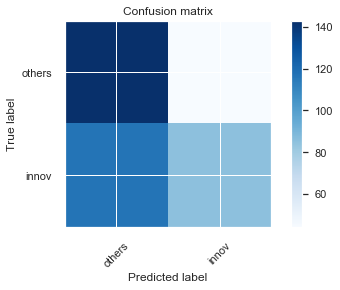


________________________________________________________________________________
Training: 
ComplementNB(alpha=0.1, class_prior=None, fit_prior=True, norm=False)
train time: 0.073s
test time:  0.009s
accuracy:   0.599
dimensionality: 311707
density: 1.000000
classification report:
              precision    recall  f1-score   support

      others       0.61      0.47      0.53       187
       innov       0.59      0.72      0.65       202

    accuracy                           0.60       389
   macro avg       0.60      0.59      0.59       389
weighted avg       0.60      0.60      0.59       389

confusion matrix:


<Figure size 432x288 with 0 Axes>

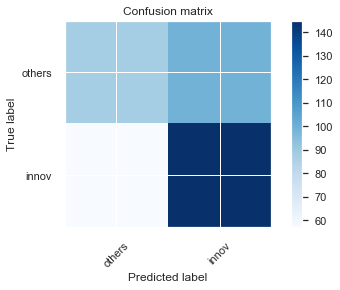


LinearSVC with L1-based feature selection
________________________________________________________________________________
Training: 
Pipeline(memory=None,
         steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     loss='squared_hinge',
                                                     max_iter=1000,
                                                     multi_class='ovr',
                                                     penalty='l1',
                                                     random_state=None,
                                                     tol=0.001, verbose=0),
                                 max_features=None, norm_order=1, prefit=False,
    

<Figure size 432x288 with 0 Axes>

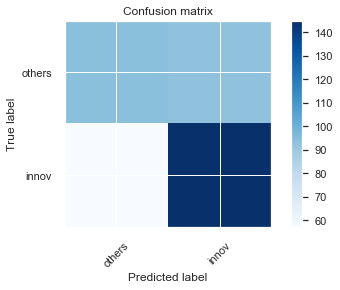

In [21]:
df = corpus_to_df(corpus_cleaned, language='nl')
x_train, x_test, y_train, y_test = train_test_split(df['id'], df['innov_'], test_size=0.1, stratify = df['innov_'], random_state=42)
tfidf = TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(corpus_cleaned.raw(id) for id in x_train)
x_test_tfidf = tfidf.transform(corpus_cleaned.raw(id) for id in x_test)
results = get_benchmark(x_train_tfidf, y_train, x_test_tfidf, y_test)

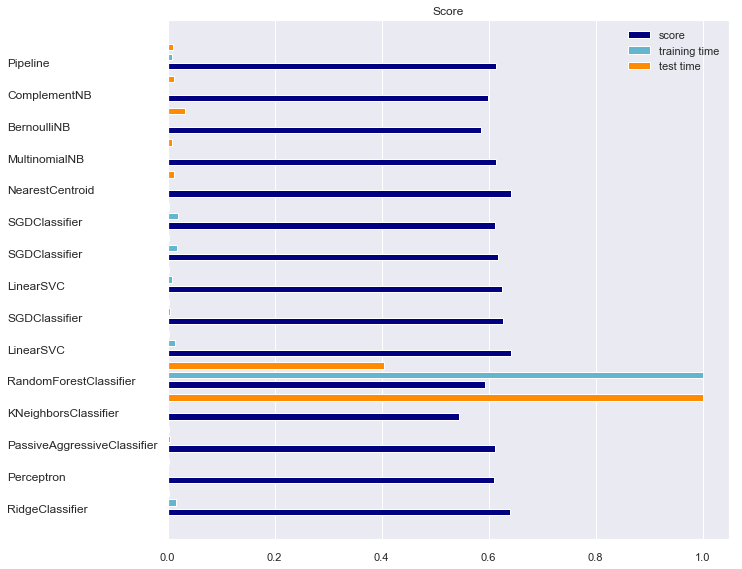

In [22]:
plot_result(results)